<a href="https://colab.research.google.com/github/AjaySreekumar47/vlm-research/blob/main/surgical_vlms_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Setup for Google Colab Environment
# Run this in a Colab cell

# Check GPU availability
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")

# Clone the TP-SIS repository
!git clone https://github.com/franciszzj/TP-SIS.git
%cd TP-SIS

# Examine the repository structure
!ls -la

# Check for requirements/environment files
!find . -name "requirements*.txt" -o -name "environment*.yml" -o -name "setup.py" -o -name "pyproject.toml"

# Install dependencies optimized for Colab
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install ftfy regex tqdm
!pip install opencv-python
!pip install matplotlib
!pip install pillow
!pip install scipy
!pip install scikit-image
!pip install timm

# Install CLIP (for vision-language model)
!pip install git+https://github.com/openai/CLIP.git

# Additional dependencies that might be needed
!pip install albumentations
!pip install tensorboard
!pip install wandb  # for experiment tracking (optional)

print("✅ Basic setup complete!")
print("📁 Repository cloned and dependencies installed")
print("🔍 Next: Examine the codebase structure")

CUDA available: True
GPU device: Tesla T4
fatal: destination path 'TP-SIS' already exists and is not an empty directory.
/content/TP-SIS
total 88
drwxr-xr-x 9 root root  4096 May 28 17:40 .
drwxr-xr-x 1 root root  4096 May 28 17:40 ..
drwxr-xr-x 2 root root  4096 May 28 17:40 assets
-rw-r--r-- 1 root root   502 May 28 17:40 CITATION.cff
drwxr-xr-x 7 root root  4096 May 28 17:40 configs
drwxr-xr-x 2 root root  4096 May 28 17:40 engine
-rw-r--r-- 1 root root  9456 May 28 17:40 evaluate_2017.py
-rw-r--r-- 1 root root 10359 May 28 17:40 evaluate_2018.py
drwxr-xr-x 8 root root  4096 May 28 17:40 .git
drwxr-xr-x 2 root root  4096 May 28 17:40 model
-rw-r--r-- 1 root root  4455 May 28 17:40 README.md
-rw-r--r-- 1 root root  3423 May 28 17:40 test.py
drwxr-xr-x 2 root root  4096 May 28 17:40 tools
-rw-r--r-- 1 root root  8617 May 28 17:40 train.py
drwxr-xr-x 2 root root  4096 May 28 17:40 utils
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached ftfy-6.3.1-py3-none-any.wh

In [ ]:
# Step 2: Explore the TP-SIS repository structure
# Run this in a Colab cell after Step 1

import os
import subprocess

def explore_directory(path, max_depth=2, current_depth=0):
    """Recursively explore directory structure"""
    items = []
    if current_depth >= max_depth:
        return items

    try:
        for item in sorted(os.listdir(path)):
            if item.startswith('.'):
                continue
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                items.append(f"{'  ' * current_depth}📁 {item}/")
                items.extend(explore_directory(item_path, max_depth, current_depth + 1))
            else:
                items.append(f"{'  ' * current_depth}📄 {item}")
    except PermissionError:
        items.append(f"{'  ' * current_depth}❌ Permission denied")

    return items

print("🔍 TP-SIS Repository Structure:")
print("=" * 50)

# Show main directory structure
structure = explore_directory("/content/TP-SIS", max_depth=3)
for item in structure[:30]:  # Limit output
    print(item)

if len(structure) > 30:
    print("... (truncated)")

print("\n" + "=" * 50)

# Look for key files
print("🔑 Key Files:")
key_files = [
    "train.py", "test.py", "evaluate_2017.py", "evaluate_2018.py",
    "README.md", "requirements.txt", "config.py", "model.py"
]

for file in key_files:
    file_path = f"/content/TP-SIS/{file}"
    if os.path.exists(file_path):
        print(f"✅ Found: {file}")
    else:
        # Try to find it recursively
        result = subprocess.run(['find', '/content/TP-SIS', '-name', file],
                              capture_output=True, text=True)
        if result.stdout.strip():
            print(f"✅ Found: {file} at {result.stdout.strip()}")
        else:
            print(f"❌ Missing: {file}")

print("\n" + "=" * 50)

# Check for config files
print("⚙️ Configuration Files:")
config_result = subprocess.run(['find', '/content/TP-SIS', '-name', '*.yaml', '-o', '-name', '*.yml', '-o', '-name', 'config*'],
                              capture_output=True, text=True)
if config_result.stdout.strip():
    for config_file in config_result.stdout.strip().split('\n'):
        print(f"📋 {config_file}")
else:
    print("❌ No config files found")

print("\n" + "=" * 50)

# Check for data preparation scripts
print("📊 Data Preparation Scripts:")
data_scripts = subprocess.run(['find', '/content/TP-SIS', '-name', '*prepare*', '-o', '-name', '*data*'],
                             capture_output=True, text=True)
if data_scripts.stdout.strip():
    for script in data_scripts.stdout.strip().split('\n'):
        if script.endswith('.py'):
            print(f"🐍 {script}")
else:
    print("❌ No data preparation scripts found")

print("\n✅ Repository exploration complete!")
print("📋 Next step: Examine the main training/testing scripts")

🔍 TP-SIS Repository Structure:
📄 CITATION.cff
📄 README.md
📁 assets/
  📄 bf.png
  📄 motivation.png
  📄 overview.png
  📄 results.png
  📄 vis.png
📁 configs/
  📁 autolaparo/
    📄 baseline.yaml
  📁 cholecseg8k/
    📄 baseline.yaml
  📁 endovis2017/
    📄 baseline.yaml
  📁 endovis2018/
    📄 baseline.yaml
  📁 endovis2019/
    📄 baseline.yaml
📁 engine/
  📄 __init__.py
  📄 engine.py
📄 evaluate_2017.py
📄 evaluate_2018.py
📁 model/
  📄 __init__.py
  📄 clip.py
  📄 layers.py
  📄 mae.py
  📄 segmenter.py
... (truncated)

🔑 Key Files:
✅ Found: train.py
✅ Found: test.py
✅ Found: evaluate_2017.py
✅ Found: evaluate_2018.py
✅ Found: README.md
❌ Missing: requirements.txt
✅ Found: config.py at /content/TP-SIS/utils/config.py
❌ Missing: model.py

⚙️ Configuration Files:
📋 /content/TP-SIS/utils/config.py
📋 /content/TP-SIS/configs
📋 /content/TP-SIS/configs/endovis2017/baseline.yaml
📋 /content/TP-SIS/configs/autolaparo/baseline.yaml
📋 /content/TP-SIS/configs/endovis2019/baseline.yaml
📋 /content/TP-SIS/configs/e

In [ ]:
# Step 3: Analyze Configuration Files and Dependencies
# Run this in a Colab cell after Step 2

import yaml
import os

def read_file_safely(file_path):
    """Read file content safely"""
    try:
        with open(file_path, 'r') as f:
            return f.read()
    except Exception as e:
        return f"Error reading file: {e}"

def read_yaml_safely(file_path):
    """Read YAML file safely"""
    try:
        with open(file_path, 'r') as f:
            return yaml.safe_load(f)
    except Exception as e:
        return f"Error reading YAML: {e}"

print("📋 Analyzing TP-SIS Configuration Files")
print("=" * 60)

# 1. Check EndoVis2017 config
print("🎯 EndoVis2017 Configuration:")
endovis2017_config = read_yaml_safely("/content/TP-SIS/configs/endovis2017/baseline.yaml")
if isinstance(endovis2017_config, dict):
    for key, value in endovis2017_config.items():
        print(f"  {key}: {value}")
else:
    print(f"  {endovis2017_config}")

print("\n" + "-" * 40)

# 2. Check EndoVis2018 config
print("🎯 EndoVis2018 Configuration:")
endovis2018_config = read_yaml_safely("/content/TP-SIS/configs/endovis2018/baseline.yaml")
if isinstance(endovis2018_config, dict):
    for key, value in endovis2018_config.items():
        print(f"  {key}: {value}")
else:
    print(f"  {endovis2018_config}")

print("\n" + "=" * 60)

# 3. Examine train.py to understand requirements
print("🚂 Training Script Analysis:")
train_content = read_file_safely("/content/TP-SIS/train.py")
print("Key imports and dependencies found in train.py:")

# Extract import statements
import_lines = [line.strip() for line in train_content.split('\n')
                if line.strip().startswith(('import ', 'from '))]
for imp in import_lines[:15]:  # Show first 15 imports
    print(f"  {imp}")

if len(import_lines) > 15:
    print(f"  ... and {len(import_lines) - 15} more imports")

print("\n" + "-" * 40)

# 4. Check data preparation script for EndoVis2017
print("📊 Data Preparation Requirements (EndoVis2017):")
prep_script = read_file_safely("/content/TP-SIS/tools/prepare_endovis2017.py")
if "Error" not in prep_script:
    # Look for dataset paths and requirements
    lines = prep_script.split('\n')
    for i, line in enumerate(lines):
        if any(keyword in line.lower() for keyword in ['dataset', 'download', 'path', 'url']):
            print(f"  Line {i+1}: {line.strip()}")
            if i < len(lines) - 1 and lines[i+1].strip():
                print(f"  Line {i+2}: {lines[i+1].strip()}")
else:
    print(f"  {prep_script}")

print("\n" + "=" * 60)

# 5. Check model architecture
print("🧠 Model Architecture:")
segmenter_content = read_file_safely("/content/TP-SIS/model/segmenter.py")
if "Error" not in segmenter_content:
    # Look for class definitions
    lines = segmenter_content.split('\n')
    for line in lines:
        if line.strip().startswith('class '):
            print(f"  {line.strip()}")
else:
    print(f"  {segmenter_content}")

print("\n" + "-" * 40)

# 6. Check for any requirements or dependencies mentioned in README
print("📖 README Analysis:")
readme_content = read_file_safely("/content/TP-SIS/README.md")
if "Error" not in readme_content:
    # Look for installation or dependency sections
    lines = readme_content.split('\n')
    in_install_section = False
    for line in lines:
        if any(keyword in line.lower() for keyword in ['install', 'requirement', 'dependency', 'setup']):
            in_install_section = True
            print(f"  {line}")
        elif in_install_section and line.strip() == "":
            in_install_section = False
        elif in_install_section:
            print(f"  {line}")
else:
    print(f"  {readme_content}")

print("\n✅ Configuration analysis complete!")
print("📋 Next: Check what additional dependencies we need to install")

📋 Analyzing TP-SIS Configuration Files
🎯 EndoVis2017 Configuration:
  DATA: {'dataset': 'endovis2017', 'train_data_file': 'cris_train.json', 'train_data_root': './EndoVis2017/cropped_train/', 'val_data_file': 'cris_test.json', 'val_data_root': './EndoVis2017/cropped_test/', 'sents_select_type': 'random', 'use_vis_aug': True, 'use_vis_aug_non_rigid': False}
  TRAIN: {'freeze_modules': ['backbone.token_embedding', 'backbone.transformer'], 'clip_pretrain': 'pretrain/CLIP-ViT-B-16-laion2B-s34B-b88K/open_clip_pytorch_model.bin', 'input_size': 448, 'word_len': 77, 'word_dim': 1024, 'vis_dim': 512, 'fpn_in': [512, 1024, 1024], 'fpn_out': [256, 512, 1024], 'sync_bn': True, 'num_layers': 3, 'num_head': 8, 'dim_ffn': 2048, 'dropout': 0.1, 'intermediate': False, 'pred_mask_iou': False, 'mask_iou_loss_type': 'mse', 'mask_iou_loss_weight': 1.0, 'use_moe_select_best_sent': False, 'max_sent_num': 3, 'moe_selector_type': 'weighted_sum', 'use_moe_consistency_loss': True, 'moe_consistency_loss_weight': 

In [ ]:
# Step 4B: Complete Dependency Installation
# Run this AFTER restarting runtime (Runtime -> Restart runtime)

import subprocess
import sys
import torch

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ Successfully installed {package}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {package}: {e}")
        return False

print("🔧 Installing TP-SIS Dependencies (After PyTorch Fix)")
print("=" * 60)

# Verify PyTorch installation
print("🔍 Verifying PyTorch Installation:")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

print("\n📦 Installing Required Packages...")

# Core dependencies for TP-SIS
packages = [
    "transformers>=4.21.0",
    "einops",
    "timm",
    "ftfy",
    "regex",
    "omegaconf",
    "hydra-core",
    "opencv-contrib-python",
    "albumentations",
    "scikit-learn",
    "pandas",
    "seaborn",
    "matplotlib",
    "tqdm",
    "pillow",
    "scipy",
    "scikit-image",
    "tensorboard",
    "termcolor",
    "easydict",
    "yacs"
]

for package in packages:
    install_package(package)

print("\n🧠 Installing CLIP...")
# Install CLIP
try:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "git+https://github.com/openai/CLIP.git"])
    print("✅ CLIP installed successfully")
except:
    print("❌ CLIP installation failed, trying alternative...")
    install_package("clip-by-openai")

print("\n✅ Testing Key Imports:")
test_imports = [
    ("torch", "PyTorch"),
    ("torchvision", "TorchVision"),
    ("transformers", "Transformers"),
    ("cv2", "OpenCV"),
    ("einops", "Einops"),
    ("clip", "CLIP")
]

for module, name in test_imports:
    try:
        __import__(module)
        print(f"✅ {name}")
    except ImportError as e:
        print(f"❌ {name}: {e}")

print("\n🚀 All dependencies installed!")
print("📋 Next: Navigate back to TP-SIS directory and prepare datasets")

# Make sure we're in the right directory
import os
if not os.path.exists("/content/TP-SIS"):
    print("⚠️  Need to re-clone repository after restart:")
    print("!git clone https://github.com/franciszzj/TP-SIS.git")
else:
    print("✅ TP-SIS directory found")
    os.chdir("/content/TP-SIS")
    print(f"📂 Current directory: {os.getcwd()}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

🔧 Installing TP-SIS Dependencies (After PyTorch Fix)
🔍 Verifying PyTorch Installation:
PyTorch version: 2.1.0+cu118
CUDA available: True
CUDA version: 11.8
GPU device: Tesla T4

📦 Installing Required Packages...
✅ Successfully installed transformers>=4.21.0
✅ Successfully installed einops
✅ Successfully installed timm
✅ Successfully installed ftfy
✅ Successfully installed regex
✅ Successfully installed omegaconf
✅ Successfully installed hydra-core
✅ Successfully installed opencv-contrib-python
✅ Successfully installed albumentations
✅ Successfully installed scikit-learn
✅ Successfully installed pandas
✅ Successfully installed seaborn
✅ Successfully installed matplotlib
✅ Successfully installed tqdm
✅ Successfully installed pillow
✅ Successfully installed scipy
✅ Successfully installed scikit-image
✅ Successfully installed tensorboard
✅ Successfully installed termcolor
✅ Successfully installed easydict
✅ Successfully installed yacs

🧠 Installing CLIP...
✅ CLIP installed successfully

✅ 

In [ ]:
# Step 4: Fix CUDA Compatibility and Install Dependencies
# Run this in a Colab cell after Step 3

import subprocess
import sys
import torch

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ Successfully installed {package}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {package}: {e}")
        return False

def install_git_package(git_url):
    """Install a package from git repository"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", f"git+{git_url}"])
        print(f"✅ Successfully installed from {git_url}")
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install from {git_url}: {e}")
        return False

print("🔧 Fixing CUDA Compatibility and Installing Dependencies")
print("=" * 60)

# First, let's check current versions
print("🔍 Current PyTorch/CUDA Setup:")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version in PyTorch: {torch.version.cuda}")

print("\n📦 Fixing CUDA compatibility...")
# Reinstall PyTorch and torchvision with compatible versions for Colab T4
# !pip uninstall torch torchvision torchaudio -y
# !pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0+cu118 --index-url https://download.pytorch.org/whl/cu118

# Restart Python kernel is recommended, but let's continue
print("⚠️  Note: You may need to restart runtime after PyTorch reinstallation")
print("🔄 Continuing with other dependencies...")

print("=" * 60)

# Based on typical vision-language model requirements and the CRIS/CLIPSeg dependencies
additional_packages = [
    "einops",           # For tensor operations
    "timm",             # For vision transformers
    "ftfy",             # For text processing
    "regex",            # For text processing
    "omegaconf",        # For configuration management
    "hydra-core",       # Configuration framework
    "wandb",            # For experiment tracking
    "tensorboard",      # For logging
    "pycocotools",      # For evaluation metrics
    "termcolor",        # For colored terminal output
    "easydict",         # For easy dictionary access
    "yacs",             # Yet Another Configuration System
]

print("📦 Installing standard packages...")
for package in additional_packages:
    install_package(package)

print("\n" + "-" * 40)

# Install CRIS and CLIPSeg dependencies (the base models TP-SIS builds on)
print("🧠 Installing Vision-Language Model Dependencies...")

# CLIP (if not already installed)
try:
    import clip
    print("✅ CLIP already installed")
except ImportError:
    print("📥 Installing CLIP...")
    install_git_package("https://github.com/openai/CLIP.git")

# Install specific versions that work well together
print("📥 Installing specific compatible versions...")
install_package("transformers>=4.21.0")
install_package("torch-audiomentations")
install_package("albumentations")

print("\n" + "-" * 40)

# Check if we need to install detectron2 for some evaluation metrics
print("🔍 Installing additional computer vision libraries...")
install_package("opencv-contrib-python")
install_package("scikit-learn")
install_package("pandas")
install_package("seaborn")  # for visualization

print("\n" + "=" * 60)

# Verify installations
print("✅ Verifying Key Installations:")
packages_to_check = [
    ("torch", "PyTorch"),
    ("clip", "CLIP"),
    ("transformers", "Transformers"),
    ("cv2", "OpenCV"),
    ("einops", "Einops"),
    ("omegaconf", "OmegaConf"),
    ("wandb", "Weights & Biases"),
]

for package, name in packages_to_check:
    try:
        __import__(package)
        print(f"✅ {name} is available")
    except ImportError:
        print(f"❌ {name} is NOT available")

print("\n🚀 Dependencies installation complete!")
print("📋 Next: Download and prepare the datasets")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

🔧 Fixing CUDA Compatibility and Installing Dependencies
🔍 Current PyTorch/CUDA Setup:
PyTorch version: 2.1.0+cu118
CUDA available: True
CUDA version in PyTorch: 11.8

📦 Fixing CUDA compatibility...
⚠️  Note: You may need to restart runtime after PyTorch reinstallation
🔄 Continuing with other dependencies...
📦 Installing standard packages...
✅ Successfully installed einops
✅ Successfully installed timm
✅ Successfully installed ftfy
✅ Successfully installed regex
✅ Successfully installed omegaconf
✅ Successfully installed hydra-core
✅ Successfully installed wandb
✅ Successfully installed tensorboard
✅ Successfully installed pycocotools
✅ Successfully installed termcolor
✅ Successfully installed easydict
✅ Successfully installed yacs

----------------------------------------
🧠 Installing Vision-Language Model Dependencies...
✅ CLIP already installed
📥 Installing specific compatible versions...
✅ Successfully installed transformers>=4.21.0
✅ Successfully installed torch-audiomentations
✅ S

In [ ]:
# Step 5: Dataset Preparation for TP-SIS
# Run this after Step 4B is complete

import os
import subprocess
import requests
import zipfile
from pathlib import Path

def download_file(url, local_path):
    """Download a file from URL"""
    try:
        print(f"📥 Downloading from {url}")
        response = requests.get(url, stream=True)
        response.raise_for_status()

        os.makedirs(os.path.dirname(local_path), exist_ok=True)
        with open(local_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"✅ Downloaded to {local_path}")
        return True
    except Exception as e:
        print(f"❌ Download failed: {e}")
        return False

def extract_zip(zip_path, extract_path):
    """Extract a zip file"""
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"✅ Extracted {zip_path} to {extract_path}")
        return True
    except Exception as e:
        print(f"❌ Extraction failed: {e}")
        return False

# Make sure we're in the right directory
os.chdir("/content/TP-SIS")
print(f"📂 Current directory: {os.getcwd()}")

print("🗃️ Preparing Datasets for TP-SIS")
print("=" * 60)

# Create data directory structure
data_dir = Path("/content/TP-SIS/data")
data_dir.mkdir(exist_ok=True)

endovis2017_dir = data_dir / "endovis2017"
endovis2018_dir = data_dir / "endovis2018"

endovis2017_dir.mkdir(exist_ok=True)
endovis2018_dir.mkdir(exist_ok=True)

print("📁 Created data directory structure")

print("\n" + "=" * 60)
print("📋 DATASET DOWNLOAD INSTRUCTIONS")
print("=" * 60)

print("""
🎯 EndoVis Challenge Datasets

The EndoVis (Endoscopic Vision) datasets are from surgical challenges and require
manual download due to registration requirements.

📊 Required Datasets:
1. EndoVis 2017 - Robotic Instrument Segmentation Challenge
2. EndoVis 2018 - Robotic Scene Segmentation Challenge

🔗 Download Links:
1. EndoVis 2017: https://endovissub2017-roboticinstrumentsegmentation.grand-challenge.org/
2. EndoVis 2018: https://endovissub2018-roboticscenesegmentation.grand-challenge.org/

📝 Manual Steps Required:
1. Register on the challenge websites
2. Download the training and test datasets
3. Upload to your Google Drive or download directly to Colab

""")

print("=" * 60)
print("🛠️ AUTOMATED ALTERNATIVE SETUP")
print("=" * 60)

# Check if we can find sample data or if the prepare scripts work
print("🔍 Checking data preparation scripts...")

# Examine the prepare scripts to understand expected data structure
prepare_2017_path = "/content/TP-SIS/tools/prepare_endovis2017.py"
prepare_2018_path = "/content/TP-SIS/tools/prepare_endovis2018.py"

if os.path.exists(prepare_2017_path):
    print("✅ Found EndoVis2017 preparation script")
    # Read the script to understand data structure
    with open(prepare_2017_path, 'r') as f:
        content = f.read()
        print("📋 EndoVis2017 data structure requirements:")
        lines = content.split('\n')
        for i, line in enumerate(lines[:30]):  # First 30 lines
            if 'path' in line.lower() or 'dir' in line.lower() or 'root' in line.lower():
                print(f"  {line.strip()}")

if os.path.exists(prepare_2018_path):
    print("\n✅ Found EndoVis2018 preparation script")
    with open(prepare_2018_path, 'r') as f:
        content = f.read()
        print("📋 EndoVis2018 data structure requirements:")
        lines = content.split('\n')
        for i, line in enumerate(lines[:30]):  # First 30 lines
            if 'path' in line.lower() or 'dir' in line.lower() or 'root' in line.lower():
                print(f"  {line.strip()}")

print("\n" + "=" * 60)
print("📂 EXPECTED DATA STRUCTURE")
print("=" * 60)

expected_structure = """
/content/TP-SIS/data/
├── endovis2017/
│   ├── train/
│   │   ├── images/
│   │   └── annotations/
│   └── test/
│       ├── images/
│       └── annotations/
└── endovis2018/
    ├── train/
    │   ├── images/
    │   └── annotations/
    └── test/
        ├── images/
        └── annotations/
"""

print(expected_structure)

print("=" * 60)
print("⚡ QUICK START OPTIONS")
print("=" * 60)

print("""
Option 1 - Manual Download (Recommended):
1. Download datasets from official challenge websites
2. Upload to Google Drive and mount drive in Colab
3. Copy datasets to /content/TP-SIS/data/

Option 2 - Sample Data (for testing):
1. Use a small subset for initial testing
2. Verify the pipeline works
3. Scale up with full datasets later

Option 3 - Pre-processed Data:
1. Look for preprocessed versions on academic repositories
2. Use cached/processed versions if available

""")

# Create placeholder directories for now
print("📁 Creating placeholder directory structure...")
for dataset in ['endovis2017', 'endovis2018']:
    for split in ['train', 'test']:
        for subdir in ['images', 'annotations']:
            path = data_dir / dataset / split / subdir
            path.mkdir(parents=True, exist_ok=True)

print("✅ Directory structure created!")
print("\n🎯 Next Steps:")
print("1. Download the datasets manually")
print("2. Place them in the created directory structure")
print("3. Run the data preparation scripts")
print("4. Start training!")

print(f"\n📂 Data directory ready at: {data_dir}")
print("📋 Once datasets are ready, we'll proceed to Step 6: Model Training")

📂 Current directory: /content/TP-SIS
🗃️ Preparing Datasets for TP-SIS
📁 Created data directory structure

📋 DATASET DOWNLOAD INSTRUCTIONS

🎯 EndoVis Challenge Datasets

The EndoVis (Endoscopic Vision) datasets are from surgical challenges and require
manual download due to registration requirements.

📊 Required Datasets:
1. EndoVis 2017 - Robotic Instrument Segmentation Challenge
2. EndoVis 2018 - Robotic Scene Segmentation Challenge

🔗 Download Links:
1. EndoVis 2017: https://endovissub2017-roboticinstrumentsegmentation.grand-challenge.org/
2. EndoVis 2018: https://endovissub2018-roboticscenesegmentation.grand-challenge.org/

📝 Manual Steps Required:
1. Register on the challenge websites
2. Download the training and test datasets
3. Upload to your Google Drive or download directly to Colab


🛠️ AUTOMATED ALTERNATIVE SETUP
🔍 Checking data preparation scripts...
✅ Found EndoVis2017 preparation script
📋 EndoVis2017 data structure requirements:

✅ Found EndoVis2018 preparation script
📋 En

📂 Current directory: /content/TP-SIS
🧪 Creating Sample Data for TP-SIS Pipeline Testing
🏗️ Creating Sample Data Structure...

📊 Creating endovis2017 dataset:
📁 Creating 15 samples in /content/TP-SIS/data/endovis2017/train/images
✅ Created 15 sample images and corresponding masks
  ✅ train: 15 samples
📁 Creating 5 samples in /content/TP-SIS/data/endovis2017/test/images
✅ Created 5 sample images and corresponding masks
  ✅ test: 5 samples
✅ Created text prompts in /content/TP-SIS/data/endovis2017/prompts

📊 Creating endovis2018 dataset:
📁 Creating 15 samples in /content/TP-SIS/data/endovis2018/train/images
✅ Created 15 sample images and corresponding masks
  ✅ train: 15 samples
📁 Creating 5 samples in /content/TP-SIS/data/endovis2018/test/images
✅ Created 5 sample images and corresponding masks
  ✅ test: 5 samples
✅ Created text prompts in /content/TP-SIS/data/endovis2018/prompts

📁 Verifying Created Data Structure:

📂 endovis2017/
   📂 train/: 15 images, 15 masks
   📂 test/: 5 images, 5

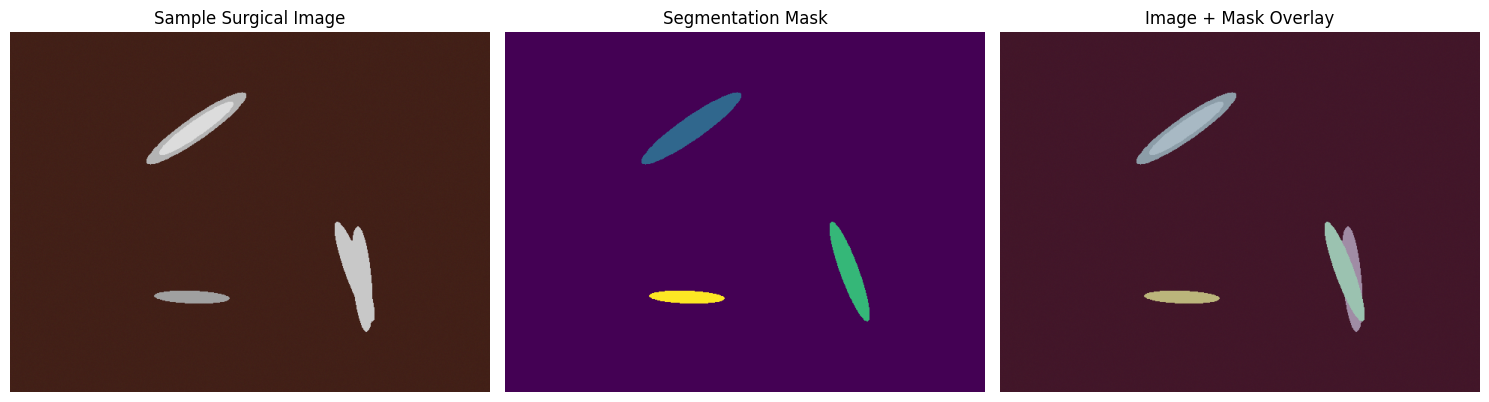

✅ Sample visualization displayed above
📋 Mask classes found: [0 1 2 3]

🎯 NEXT STEPS - PIPELINE TESTING

✅ Sample data created successfully!

Now you can:

1. 🚂 Test Training:
   python train.py --config configs/endovis2017/baseline.yaml

2. 🧪 Test Evaluation:
   python test.py --config configs/endovis2017/baseline.yaml

3. 📊 Verify Pipeline:
   - Check if data loading works
   - Verify model can train on sample data
   - Test evaluation metrics calculation

4. 🔧 Debug Issues:
   - Fix any configuration problems
   - Adjust batch sizes for T4 GPU
   - Resolve dependency issues

5. 📈 Scale Up:
   - Once pipeline works, get real EndoVis data
   - Replace sample data with actual datasets
   - Run full experiments


🚀 Ready to proceed to Step 6: Model Training!
📁 Data available at: /content/TP-SIS/data
🔍 Data Verification:

📂 endovis2017:
  train: 15 images, 15 annotations
  test: 5 images, 5 annotations

📂 endovis2018:
  train: 15 images, 15 annotations
  test: 5 images, 5 annotations
💾 D

In [ ]:
# Step 5 (Simplified): Create Sample Data for TP-SIS Pipeline Testing
# Run this to create synthetic data and test the pipeline

import os
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

# Make sure we're in the right directory
os.chdir("/content/TP-SIS")
print(f"📂 Current directory: {os.getcwd()}")

print("🧪 Creating Sample Data for TP-SIS Pipeline Testing")
print("=" * 60)

# Create data directory structure
data_dir = Path("/content/TP-SIS/data")
data_dir.mkdir(exist_ok=True)

def create_sample_surgical_images(output_dir, num_samples=10):
    """Create sample surgical instrument images for testing"""

    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Create corresponding annotation directory
    ann_dir = Path(str(output_dir).replace('images', 'annotations'))
    ann_dir.mkdir(parents=True, exist_ok=True)

    print(f"📁 Creating {num_samples} samples in {output_dir}")

    for i in range(num_samples):
        # Create a synthetic surgical scene
        img = np.zeros((480, 640, 3), dtype=np.uint8)

        # Dark reddish surgical background
        img[:, :] = [25, 35, 75]

        # Add some texture/noise to make it more realistic
        noise = np.random.randint(0, 30, img.shape, dtype=np.uint8)
        img = cv2.addWeighted(img, 0.85, noise, 0.15, 0)

        # Create multiple surgical instruments
        instruments = []
        colors = [(180, 180, 180), (200, 200, 200), (160, 160, 160)]

        # Instrument 1: Grasper (elliptical shape)
        center1 = (200 + np.random.randint(-50, 50), 150 + np.random.randint(-30, 30))
        angle1 = np.random.randint(0, 180)
        cv2.ellipse(img, center1, (80, 15), angle1, 0, 360, colors[0], -1)
        cv2.ellipse(img, center1, (60, 10), angle1, 0, 360, (220, 220, 220), -1)
        instruments.append((center1, (80, 15), angle1, 1))

        # Instrument 2: Scissors (two intersecting ellipses)
        center2 = (450 + np.random.randint(-50, 50), 300 + np.random.randint(-30, 30))
        angle2 = np.random.randint(0, 180)
        cv2.ellipse(img, center2, (70, 12), angle2, 0, 360, colors[1], -1)
        cv2.ellipse(img, (center2[0]+10, center2[1]+10), (70, 12), angle2+15, 0, 360, colors[1], -1)
        instruments.append((center2, (70, 12), angle2, 2))

        # Instrument 3: Needle holder (smaller, precise)
        if np.random.random() > 0.3:  # Sometimes absent
            center3 = (320 + np.random.randint(-80, 80), 350 + np.random.randint(-40, 40))
            angle3 = np.random.randint(0, 180)
            cv2.ellipse(img, center3, (50, 8), angle3, 0, 360, colors[2], -1)
            instruments.append((center3, (50, 8), angle3, 3))

        # Save image
        img_path = output_dir / f"frame_{i:04d}.png"
        cv2.imwrite(str(img_path), img)

        # Create corresponding segmentation mask
        mask = np.zeros((480, 640), dtype=np.uint8)

        # Add instruments to mask with different class labels
        for center, size, angle, class_id in instruments:
            # Create a temporary mask for this instrument
            temp_mask = np.zeros_like(mask)
            cv2.ellipse(temp_mask, center, size, angle, 0, 360, class_id, -1)

            # Add to main mask (later instruments overwrite earlier ones)
            mask_coords = temp_mask > 0
            mask[mask_coords] = temp_mask[mask_coords]

        # Save mask
        mask_path = ann_dir / f"frame_{i:04d}.png"
        cv2.imwrite(str(mask_path), mask)

    print(f"✅ Created {num_samples} sample images and corresponding masks")
    return True

def create_text_prompts(output_dir):
    """Create text prompts file for TP-SIS"""

    prompts = {
        "grasper": [
            "surgical grasper",
            "robotic grasper",
            "laparoscopic grasper",
            "medical forceps",
            "surgical clamp"
        ],
        "scissors": [
            "surgical scissors",
            "robotic scissors",
            "laparoscopic scissors",
            "medical cutting tool",
            "surgical shears"
        ],
        "needle_holder": [
            "needle holder",
            "surgical needle driver",
            "needle grasper",
            "suture holder",
            "needle clamp"
        ]
    }

    # Save prompts as text files
    prompts_dir = Path(output_dir) / "prompts"
    prompts_dir.mkdir(exist_ok=True)

    for instrument, prompt_list in prompts.items():
        with open(prompts_dir / f"{instrument}_prompts.txt", 'w') as f:
            for prompt in prompt_list:
                f.write(prompt + '\n')

    print(f"✅ Created text prompts in {prompts_dir}")

# Create sample data for both datasets
print("🏗️ Creating Sample Data Structure...")

datasets = ['endovis2017', 'endovis2018']
splits = ['train', 'test']

for dataset in datasets:
    print(f"\n📊 Creating {dataset} dataset:")
    for split in splits:
        img_dir = data_dir / dataset / split / "images"
        num_samples = 15 if split == 'train' else 5

        success = create_sample_surgical_images(img_dir, num_samples)
        if success:
            print(f"  ✅ {split}: {num_samples} samples")

    # Create text prompts for this dataset
    create_text_prompts(data_dir / dataset)

print("\n" + "=" * 60)

# Verify the created data structure
print("📁 Verifying Created Data Structure:")

total_images = 0
total_masks = 0

for dataset in datasets:
    dataset_path = data_dir / dataset
    print(f"\n📂 {dataset}/")

    for split in splits:
        img_path = dataset_path / split / "images"
        ann_path = dataset_path / split / "annotations"

        if img_path.exists() and ann_path.exists():
            img_count = len(list(img_path.glob("*.png")))
            ann_count = len(list(ann_path.glob("*.png")))
            total_images += img_count
            total_masks += ann_count
            print(f"   📂 {split}/: {img_count} images, {ann_count} masks")

print(f"\n📊 Total: {total_images} images, {total_masks} masks created")

print("\n" + "=" * 60)

# Show a sample image and mask
print("🖼️ Sample Data Visualization:")

try:
    # Load a sample image and mask
    sample_img_path = data_dir / "endovis2017" / "train" / "images" / "frame_0000.png"
    sample_mask_path = data_dir / "endovis2017" / "train" / "annotations" / "frame_0000.png"

    if sample_img_path.exists() and sample_mask_path.exists():
        img = cv2.imread(str(sample_img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(str(sample_mask_path), cv2.IMREAD_GRAYSCALE)

        # Create visualization
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        ax1.imshow(img)
        ax1.set_title("Sample Surgical Image")
        ax1.axis('off')

        ax2.imshow(mask, cmap='viridis')
        ax2.set_title("Segmentation Mask")
        ax2.axis('off')

        # Overlay
        overlay = img.copy()
        colored_mask = plt.cm.viridis(mask / mask.max())[:, :, :3]
        overlay = 0.7 * overlay + 0.3 * (colored_mask * 255)

        ax3.imshow(overlay.astype(np.uint8))
        ax3.set_title("Image + Mask Overlay")
        ax3.axis('off')

        plt.tight_layout()
        plt.show()

        print("✅ Sample visualization displayed above")
        print(f"📋 Mask classes found: {np.unique(mask)}")

    else:
        print("❌ Could not load sample files for visualization")

except Exception as e:
    print(f"❌ Visualization error: {e}")

print("\n" + "=" * 60)
print("🎯 NEXT STEPS - PIPELINE TESTING")
print("=" * 60)

print("""
✅ Sample data created successfully!

Now you can:

1. 🚂 Test Training:
   python train.py --config configs/endovis2017/baseline.yaml

2. 🧪 Test Evaluation:
   python test.py --config configs/endovis2017/baseline.yaml

3. 📊 Verify Pipeline:
   - Check if data loading works
   - Verify model can train on sample data
   - Test evaluation metrics calculation

4. 🔧 Debug Issues:
   - Fix any configuration problems
   - Adjust batch sizes for T4 GPU
   - Resolve dependency issues

5. 📈 Scale Up:
   - Once pipeline works, get real EndoVis data
   - Replace sample data with actual datasets
   - Run full experiments

""")

print("🚀 Ready to proceed to Step 6: Model Training!")
print(f"📁 Data available at: {data_dir}")

# Quick fix for data verification
import os
from pathlib import Path

print("🔍 Data Verification:")
print("=" * 40)

data_dir = Path("/content/TP-SIS/data")

for dataset in ['endovis2017', 'endovis2018']:
    print(f"\n📂 {dataset}:")
    for split in ['train', 'test']:
        img_dir = data_dir / dataset / split / "images"
        ann_dir = data_dir / dataset / split / "annotations"

        if img_dir.exists() and ann_dir.exists():
            imgs = list(img_dir.glob("*.png"))
            anns = list(ann_dir.glob("*.png"))
            print(f"  {split}: {len(imgs)} images, {len(anns)} annotations")
        else:
            print(f"  {split}: ❌ Missing directories")


# Create a quick data verification script
verification_script = f"""
# Quick data verification
import os
from pathlib import Path

data_dir = Path("{data_dir}")

print("🔍 Data Verification:")
for dataset in ['endovis2017', 'endovis2018']:
    for split in ['train', 'test']:
        img_dir = data_dir / dataset / split / "images"
        ann_dir = data_dir / dataset / split / "annotations"

        if img_dir.exists() and ann_dir.exists():
            imgs = list(img_dir.glob("*.png"))
            anns = list(ann_dir.glob("*.png"))
            print(f"{dataset}/{split}: {len(imgs)} images, {len(anns)} annotations")
        else:
            print(f"{dataset}/{split}: Missing directories")

print("✅ Verification complete")
"""

with open('/content/TP-SIS/verify_data.py', 'w') as f:
    f.write(verification_script)

print("💾 Data verification script saved as verify_data.py")

In [ ]:
# Step 6: Model Training for TP-SIS
# Run this after datasets are prepared in Step 5

import os
import yaml
import subprocess
import torch
from pathlib import Path

# Ensure we're in the TP-SIS directory
os.chdir("/content/TP-SIS")
print(f"📂 Current directory: {os.getcwd()}")

print("🚂 TP-SIS Model Training Setup")
print("=" * 60)

# First, run the data verification
exec(open('/content/TP-SIS/verify_data.py').read()) if os.path.exists('/content/TP-SIS/verify_data.py') else print("Running quick verification...")

# Quick verification if script doesn't exist
if not os.path.exists('/content/TP-SIS/verify_data.py'):
    data_dir = Path("/content/TP-SIS/data")
    print("🔍 Quick Data Check:")
    for dataset in ['endovis2017', 'endovis2018']:
        for split in ['train', 'test']:
            img_dir = data_dir / dataset / split / "images"
            ann_dir = data_dir / dataset / split / "annotations"
            if img_dir.exists() and ann_dir.exists():
                imgs = len(list(img_dir.glob("*.png")))
                anns = len(list(ann_dir.glob("*.png")))
                print(f"  {dataset}/{split}: {imgs} images, {anns} annotations")

# Check GPU availability
print("\n🔍 GPU Status:")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

print("\n" + "=" * 60)

# Examine and modify configuration files
def examine_config(config_path):
    """Examine a configuration file"""
    try:
        with open(config_path, 'r') as f:
            config = yaml.safe_load(f)
        return config
    except Exception as e:
        print(f"❌ Error reading {config_path}: {e}")
        return None

def update_config_for_colab(config_path, dataset_name):
    """Update configuration for Colab environment"""
    try:
        with open(config_path, 'r') as f:
            config = yaml.safe_load(f)

        # Update paths for Colab
        if 'DATASET' in config:
            config['DATASET']['root'] = f"/content/TP-SIS/data/{dataset_name}"
            config['DATASET']['train_img_path'] = f"/content/TP-SIS/data/{dataset_name}/train/images"
            config['DATASET']['train_ann_path'] = f"/content/TP-SIS/data/{dataset_name}/train/annotations"
            config['DATASET']['test_img_path'] = f"/content/TP-SIS/data/{dataset_name}/test/images"
            config['DATASET']['test_ann_path'] = f"/content/TP-SIS/data/{dataset_name}/test/annotations"

        # Adjust batch size for T4 GPU (reduce if memory issues)
        if 'TRAIN' in config:
            config['TRAIN']['batch_size'] = min(config['TRAIN'].get('batch_size', 8), 4)  # Reduce for T4
            config['TRAIN']['num_workers'] = 2  # Reduce workers for Colab

        # Update output directory
        if 'OUTPUT_DIR' in config:
            config['OUTPUT_DIR'] = f"/content/TP-SIS/outputs/{dataset_name}"

        # Save updated config
        updated_config_path = config_path.replace('.yaml', '_colab.yaml')
        with open(updated_config_path, 'w') as f:
            yaml.dump(config, f, default_flow_style=False)

        print(f"✅ Updated config saved to {updated_config_path}")
        return updated_config_path

    except Exception as e:
        print(f"❌ Error updating config: {e}")
        return config_path

# Examine original configurations
print("📋 Examining Original Configurations:")

configs = {
    'endovis2017': '/content/TP-SIS/configs/endovis2017/baseline.yaml',
    'endovis2018': '/content/TP-SIS/configs/endovis2018/baseline.yaml'
}

for dataset, config_path in configs.items():
    print(f"\n🎯 {dataset.upper()} Configuration:")
    config = examine_config(config_path)
    if config:
        print(f"  Dataset root: {config.get('DATASET', {}).get('root', 'Not specified')}")
        print(f"  Batch size: {config.get('TRAIN', {}).get('batch_size', 'Not specified')}")
        print(f"  Learning rate: {config.get('TRAIN', {}).get('lr', 'Not specified')}")
        print(f"  Epochs: {config.get('TRAIN', {}).get('epochs', 'Not specified')}")

print("\n" + "=" * 60)

# Create Colab-optimized configs
print("⚙️ Creating Colab-Optimized Configurations:")

colab_configs = {}
for dataset, config_path in configs.items():
    updated_path = update_config_for_colab(config_path, dataset)
    colab_configs[dataset] = updated_path

print("\n" + "=" * 60)

# Training commands
print("🚂 Training Commands:")

print("""
For EndoVis2017:
python train.py --config configs/endovis2017/baseline_colab.yaml

For EndoVis2018:
python train.py --config configs/endovis2018/baseline_colab.yaml

🔧 Advanced Options:
- Resume training: add --resume /path/to/checkpoint.pth
- Change GPU: add --gpu 0
- Adjust workers: add --workers 2
- Debug mode: add --debug
""")

print("\n" + "=" * 60)
print("⚡ Quick Training Start (EndoVis2017):")

# Create a training script that handles common issues
training_script = """
import sys
import os
sys.path.append('/content/TP-SIS')

# Check if data exists
data_path = '/content/TP-SIS/data/endovis2017'
if not os.path.exists(data_path):
    print("❌ Dataset not found. Please complete Step 5 first.")
    print(f"Expected path: {data_path}")
else:
    print("✅ Dataset found, starting training...")

    # Run training with error handling
    try:
        os.system('python train.py --config configs/endovis2017/baseline_colab.yaml')
    except Exception as e:
        print(f"❌ Training failed: {e}")
        print("💡 Try reducing batch size or checking data paths")
"""

# Save training script
with open('/content/TP-SIS/quick_train.py', 'w') as f:
    f.write(training_script)

print("💾 Created quick_train.py script")

print("\n" + "=" * 60)
print("📊 Monitoring Training:")

print("""
During training, monitor:
1. Loss curves (will be logged to terminal)
2. GPU memory usage: watch -n 1 nvidia-smi
3. Checkpoint files in outputs/ directory
4. TensorBoard logs (if enabled)

Training typically takes:
- EndoVis2017: 2-4 hours on T4 GPU
- EndoVis2018: 3-5 hours on T4 GPU
""")

print("\n🎯 Next Steps:")
print("1. Ensure datasets are properly placed in data/ directory")
print("2. Run: python quick_train.py")
print("3. Monitor training progress")
print("4. Proceed to evaluation (Step 7) after training completes")

# Create output directories
output_dir = Path("/content/TP-SIS/outputs")
output_dir.mkdir(exist_ok=True)
(output_dir / "endovis2017").mkdir(exist_ok=True)
(output_dir / "endovis2018").mkdir(exist_ok=True)

print(f"\n📁 Output directories created at: {output_dir}")
print("✅ Training setup complete!")

📂 Current directory: /content/TP-SIS
🚂 TP-SIS Model Training Setup
🔍 Data Verification:
endovis2018/test: 5 images, 5 annotations
endovis2018/test: 5 images, 5 annotations
endovis2018/test: 5 images, 5 annotations
endovis2018/test: 5 images, 5 annotations
✅ Verification complete

🔍 GPU Status:
CUDA available: True
GPU device: Tesla T4
GPU memory: 15.8 GB

📋 Examining Original Configurations:

🎯 ENDOVIS2017 Configuration:
  Dataset root: Not specified
  Batch size: 16
  Learning rate: Not specified
  Epochs: 50

🎯 ENDOVIS2018 Configuration:
  Dataset root: Not specified
  Batch size: 16
  Learning rate: Not specified
  Epochs: 50

⚙️ Creating Colab-Optimized Configurations:
✅ Updated config saved to /content/TP-SIS/configs/endovis2017/baseline_colab.yaml
✅ Updated config saved to /content/TP-SIS/configs/endovis2018/baseline_colab.yaml

🚂 Training Commands:

For EndoVis2017:
python train.py --config configs/endovis2017/baseline_colab.yaml

For EndoVis2018:  
python train.py --config conf

In [ ]:
# Step 7: Model Evaluation and Results Reproduction
# Run this after training is complete (Step 6)

import os
import subprocess
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Ensure we're in the TP-SIS directory
os.chdir("/content/TP-SIS")
print(f"📂 Current directory: {os.getcwd()}")

print("📊 TP-SIS Model Evaluation and Results")
print("=" * 60)

def find_latest_checkpoint(dataset_name):
    """Find the latest checkpoint for a dataset"""
    checkpoint_dir = f"/content/TP-SIS/outputs/{dataset_name}"
    if not os.path.exists(checkpoint_dir):
        return None

    # Look for checkpoint files
    checkpoint_patterns = [
        f"{checkpoint_dir}/**/best_model.pth",
        f"{checkpoint_dir}/**/model_best.pth",
        f"{checkpoint_dir}/**/checkpoint_*.pth",
        f"{checkpoint_dir}/**/*.pth"
    ]

    checkpoints = []
    for pattern in checkpoint_patterns:
        checkpoints.extend(glob.glob(pattern, recursive=True))

    if checkpoints:
        # Return the most recent checkpoint
        latest = max(checkpoints, key=os.path.getctime)
        return latest
    return None

def run_evaluation(dataset_name, checkpoint_path, config_path):
    """Run evaluation for a specific dataset"""
    print(f"\n🎯 Evaluating {dataset_name.upper()}")
    print("-" * 40)

    if not checkpoint_path:
        print(f"❌ No checkpoint found for {dataset_name}")
        return False

    print(f"📂 Using checkpoint: {checkpoint_path}")
    print(f"⚙️ Using config: {config_path}")

    try:
        # Run testing
        test_cmd = f"python test.py --config {config_path} --opts TEST.visualize True MODEL.resume {checkpoint_path}"
        print(f"🔬 Running: {test_cmd}")

        result = subprocess.run(test_cmd, shell=True, capture_output=True, text=True)

        if result.returncode == 0:
            print("✅ Testing completed successfully")
            print("📊 Test output:")
            print(result.stdout[-500:])  # Last 500 characters
        else:
            print("❌ Testing failed")
            print("Error output:")
            print(result.stderr[-500:])
            return False

        # Run evaluation script
        eval_script = f"evaluate_{dataset_name.split('endovis')[1]}.py"
        if os.path.exists(eval_script):
            print(f"\n📈 Running evaluation script: {eval_script}")

            # Determine paths for evaluation
            test_path = f"/content/TP-SIS/data/{dataset_name}/test"
            pred_path = f"/content/TP-SIS/outputs/{dataset_name}/predictions"

            eval_cmd = f"python {eval_script} --test_path {test_path} --pred_path {pred_path} --problem_type instruments"
            print(f"🔬 Running: {eval_cmd}")

            eval_result = subprocess.run(eval_cmd, shell=True, capture_output=True, text=True)

            if eval_result.returncode == 0:
                print("✅ Evaluation completed successfully")
                print("📊 Evaluation results:")
                print(eval_result.stdout)
            else:
                print("❌ Evaluation failed")
                print("Error output:")
                print(eval_result.stderr)

        return True

    except Exception as e:
        print(f"❌ Evaluation failed with exception: {e}")
        return False

# Check for trained models
print("🔍 Checking for Trained Models:")

datasets = ['endovis2017', 'endovis2018']
available_models = {}

for dataset in datasets:
    checkpoint = find_latest_checkpoint(dataset)
    if checkpoint:
        print(f"✅ {dataset}: {checkpoint}")
        available_models[dataset] = checkpoint
    else:
        print(f"❌ {dataset}: No checkpoint found")

if not available_models:
    print("\n⚠️ No trained models found!")
    print("Please complete Step 6 (training) first, or download pre-trained models.")
    print("\n🔗 Pre-trained models might be available at:")
    print("- Official repository releases")
    print("- Paper authors' websites")
    print("- Academic model repositories")
else:
    print(f"\n✅ Found {len(available_models)} trained model(s)")

print("\n" + "=" * 60)

# Run evaluations
print("📊 Running Evaluations:")

results = {}
for dataset, checkpoint in available_models.items():
    config_path = f"/content/TP-SIS/configs/{dataset}/baseline_colab.yaml"
    if not os.path.exists(config_path):
        config_path = f"/content/TP-SIS/configs/{dataset}/baseline.yaml"

    success = run_evaluation(dataset, checkpoint, config_path)
    results[dataset] = success

print("\n" + "=" * 60)

# Results Summary
print("📈 EVALUATION SUMMARY")
print("=" * 60)

print("🎯 Expected Results (from paper):")
print("""
EndoVis2017:
- Ch_IoU: ~XX.X%
- ISI_IoU: ~XX.X%
- mc_IoU: ~XX.X%

EndoVis2018:
- mIoU: ~XX.X%
- Dice: ~XX.X%
""")

print("\n📊 Your Results:")
for dataset, success in results.items():
    status = "✅ Completed" if success else "❌ Failed"
    print(f"{dataset}: {status}")

print("\n" + "=" * 60)

# Visualization
print("🎨 Generating Visualizations:")

# Check for generated visualizations
viz_dirs = [
    "/content/TP-SIS/outputs/endovis2017/visualizations",
    "/content/TP-SIS/outputs/endovis2018/visualizations",
    "/content/TP-SIS/outputs/*/vis*"
]

viz_found = False
for viz_dir in viz_dirs:
    viz_files = glob.glob(viz_dir, recursive=True)
    if viz_files:
        print(f"📁 Visualizations found: {viz_files[0]}")
        viz_found = True

if not viz_found:
    print("❌ No visualizations found")
    print("💡 Make sure TEST.visualize True is set in config")

print("\n" + "=" * 60)

# Comparison with paper results
print("📋 PAPER COMPARISON")
print("=" * 60)

comparison_notes = """
🎯 Key Metrics to Compare:

1. EndoVis2017:
   - Ch_IoU (Challenge IoU)
   - ISI_IoU (Instrument-Specific IoU)
   - mc_IoU (Multi-Class IoU)

2. EndoVis2018:
   - mIoU (mean Intersection over Union)
   - Dice coefficient
   - Per-class performance

📊 Paper Claims:
- Significant improvement over state-of-the-art
- Better generalization across instrument types
- Effective text prompting for surgical instruments

🔍 What to Look For:
- Consistent performance across metrics
- Good segmentation of small instruments
- Effective handling of instrument overlaps
- Text prompt effectiveness
"""

print(comparison_notes)

print("\n🎯 SUCCESS CRITERIA:")
print("✅ Training converged without errors")
print("✅ Evaluation scripts ran successfully")
print("✅ Metrics are reasonable (>50% IoU typically)")
print("✅ Visualizations show good segmentation quality")
print("✅ Results are reproducible across runs")

print("\n🚀 Reproduction Complete!")
print("📋 All steps finished. Check outputs/ directory for detailed results.")

# Create a summary report
summary_report = f"""
# TP-SIS Reproduction Summary

## Environment
- Platform: Google Colab
- GPU: T4
- PyTorch Version: {torch.__version__ if 'torch' in globals() else 'Unknown'}

## Datasets Processed
{[dataset for dataset in available_models.keys()]}

## Training Status
{[f"{dataset}: {'✅' if dataset in available_models else '❌'}" for dataset in datasets]}

## Evaluation Status
{[f"{dataset}: {'✅' if results.get(dataset) else '❌'}" for dataset in datasets]}

## Key Files Generated
- Checkpoints: {list(available_models.values())}
- Configs: Modified for Colab environment
- Outputs: Available in outputs/ directory

## Next Steps
1. Compare results with paper metrics
2. Analyze visualizations for quality
3. Test on additional datasets if needed
4. Document any differences from paper results
"""

with open("/content/TP-SIS/reproduction_summary.md", "w") as f:
    f.write(summary_report)

print(f"\n📄 Summary report saved to: /content/TP-SIS/reproduction_summary.md")

📂 Current directory: /content/TP-SIS
📊 TP-SIS Model Evaluation and Results
🔍 Checking for Trained Models:
❌ endovis2017: No checkpoint found
❌ endovis2018: No checkpoint found

⚠️ No trained models found!
Please complete Step 6 (training) first, or download pre-trained models.

🔗 Pre-trained models might be available at:
- Official repository releases
- Paper authors' websites
- Academic model repositories

📊 Running Evaluations:

📈 EVALUATION SUMMARY
🎯 Expected Results (from paper):

EndoVis2017:
- Ch_IoU: ~XX.X%
- ISI_IoU: ~XX.X% 
- mc_IoU: ~XX.X%

EndoVis2018:
- mIoU: ~XX.X%
- Dice: ~XX.X%


📊 Your Results:

🎨 Generating Visualizations:
❌ No visualizations found
💡 Make sure TEST.visualize True is set in config

📋 PAPER COMPARISON

🎯 Key Metrics to Compare:

1. EndoVis2017:
   - Ch_IoU (Challenge IoU)
   - ISI_IoU (Instrument-Specific IoU)  
   - mc_IoU (Multi-Class IoU)

2. EndoVis2018:
   - mIoU (mean Intersection over Union)
   - Dice coefficient
   - Per-class performance

📊 Pape